In [1]:
import os
os.environ['CASTLE_BACKEND'] = 'pytorch'

import numpy as np
import networkx as nx

import castle

from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC

from castle.common.priori_knowledge import PrioriKnowledge

import matplotlib.pyplot as plt

C:\Users\aleks\anaconda3\envs\causal_book_py38_dw09\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-30 18:59:14,058 - C:\Users\aleks\anaconda3\envs\causal_book_py38_dw09\lib\site-packages\castle\algorithms\__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


In [2]:
castle.__version__

'1.0.3'

In [3]:
COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000'
]

# PC algorithm with expert knowledge in `gCastle`

**PC algorithm** is a popular contraint-based causal discovery algorithm. 

Expert knowledge can be added to the algorithm to help it converge.

________

Keywords: Casusal Discovery, Python, causalpython.io

_________

**Check [Causal Python](https://causalpython.io)** to learn more about my upcoming book, where we discuss causal discovery in greater detail.

In [4]:
# Set random seed
SEED = 18
np.random.seed(SEED)

## Data

In [5]:
# Generate a scale-free adjacency matrix
adj_matrix = DAG.scale_free(
    n_nodes=10,
    n_edges=17,
    seed=SEED
)

dataset = IIDSimulation(
    W=adj_matrix, 
    n=10000, 
    method='linear', 
    sem_type='gauss'
)

2023-05-30 18:59:20,110 - C:\Users\aleks\anaconda3\envs\causal_book_py38_dw09\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


## Causal discovery (no expert knowledge)

In [6]:
# Instantiate the model
pc = PC()

In [7]:
# Fit the model
pc.learn(dataset.X)

In [8]:
# Get the predicted graph
pred_dag = pc.causal_matrix

## Evaluation 1

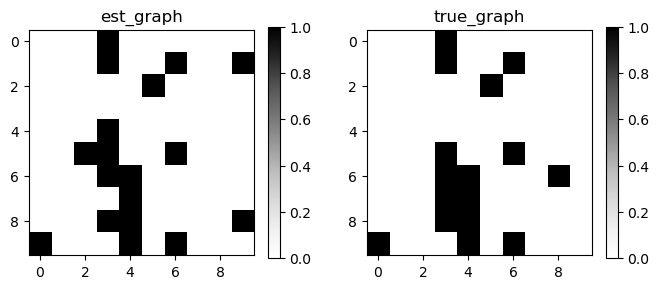

In [9]:
# Compare the predicted graph vs the ground truth 
GraphDAG(
    est_dag=pred_dag, 
    true_dag=adj_matrix)

plt.show()

In [10]:
# Compute metrics
metrics = MetricsDAG(
    B_est=pred_dag, 
    B_true=adj_matrix)

In [11]:
print(f"F1 score without expert knowledge: {metrics.metrics['F1']}")

F1 score without expert knowledge: 0.8235


## Add expert knowledge

In [31]:
# Instantiate and encode priori knowledge
expert_knowledge = PrioriKnowledge(n_nodes=10)

# Add required & forbidden edges
expert_knowledge.add_required_edges([(7, 3)])
expert_knowledge.add_forbidden_edges([(5, 2), (1, 9), (8, 9)])

## Causal discovery (with expert knowledge)

In [32]:
# Instantiate the model with expert knowledge
pc_expert = PC(priori_knowledge=expert_knowledge)

# Learn
pc_expert.learn(dataset.X)

# Predict (with expert knowledge added)
pred_dag_expert = pc_expert.causal_matrix

## Evaluation 2

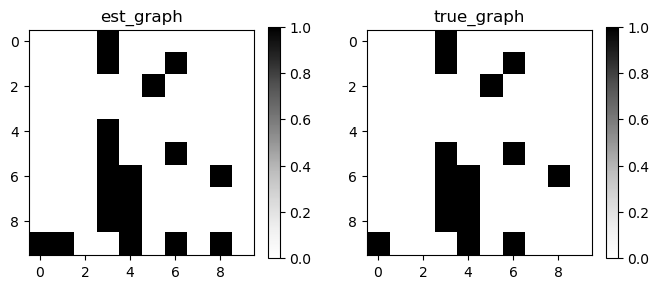

In [33]:
GraphDAG(
    est_dag=pred_dag_expert, 
    true_dag=adj_matrix)

plt.show()

In [34]:
# Compute metrics
metrics_expert = MetricsDAG(
    B_est=pred_dag_expert, 
    B_true=adj_matrix)

In [35]:
print(f"F1 score without expert knowledge: {metrics.metrics['F1']}")
print(f"F1 score with    expert knowledge: {metrics_expert.metrics['F1']}")

F1 score without expert knowledge: 0.8235
F1 score with    expert knowledge: 0.9143
